## imported the dependency

In [1]:
from torch.utils.data import Dataset
import torch.nn.functional as F
from collections import Counter
from os.path import exists
import torch.optim as optim
import torch.nn as nn
import numpy as np
import random
import torch
import math
import re

import helper.utils as utils
import helper.dataset as dataUtils
import helper.model as modelUtils
import helper.main as mainUtils

/home/gauravp/anaconda3/envs/eva8/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


## Declare the parameters

In [2]:
print('initializing..')
train_batch_size = 128
test_batch_size=20
seq_len = 20
embed_size = 128
inner_ff_size = embed_size * 4
n_heads = 8
n_code = 8
n_vocab = 40000
dropout = 0.1
pth = 'wikiPages_football.txt'


initializing..


In [3]:
train_dataset,test_dataset,train_data_loader,test_data_loader,vocab=utils.createData(pth,train_batch_size,test_batch_size,seq_len,n_vocab)

reading the sentences
totalNumberOfSentences 1648
trainingSentencesCount 1318
tokenizing the sentences
tokenizing sentences...
creating/loading vocab...
creating train & test dataset...


In [5]:
# len(test_dataset)
next(iter(test_data_loader))

{'input': tensor([[    0,    10,    65,    11,    57,    14,    38,  5674, 11157,   359,
             12,     7, 10947,   193, 11734,     3,    65,    10,     5,    82],
         [  841,     3,  1520,    23,   164,  4803,     1, 12153,    22,   132,
             63,     1,    76,  1143,    86,  7728,   550,  9085,    20,  3671],
         [ 1059,   287,  2969,    11,  1249,   184,   935,  4034,     5, 11855,
              1,   199,  4496,     1,  8053,    12,    17,    34,   194,  7637],
         [   83,     7,   187,  1289,   529,   673,  1765,   560,    14,   105,
             56,     2,   377,    85,     7,   285,  6201,  4340,    34,   591],
         [  550,   224,  4249,     3,   214,  1545,  1997,  1928, 10894,     1,
            773,     7,  8074,   539,    21,    45,   990,    89,     1,  8392],
         [    0,    89,     3,   837,    11,  2021,   837,    89,  8510,     7,
           4430,   169,   441,    89, 12314,     5,   837,     1,   100,    74],
         [    5,    49,  

## Create a model

In [6]:
model = modelUtils.Transformer(n_code, n_heads, embed_size, inner_ff_size, len(train_dataset.vocab), seq_len, dropout)
model = model.cuda()

In [7]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Transformer Layer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 100 different named parameters.

==== Embedding Layer ====

embeddings.weight                                       (12572, 128)
encoders.0.mha.linear.weight                              (384, 128)
encoders.0.mha.linear.bias                                    (384,)
encoders.0.mha.out.weight                                 (128, 128)
encoders.0.mha.out.bias                                       (128,)

==== Transformer Layer ====

encoders.0.ff.linear1.weight                              (512, 128)
encoders.0.ff.linear1.bias                                    (512,)
encoders.0.ff.linear2.weight                              (128, 512)
encoders.0.ff.linear2.bias                                    (128,)
encoders.0.norm1.weight                                       (128,)
encoders.0.norm1.bias                                         (128,)
encoders.0.norm2.weight                                       (128,)
encoders.0.norm2.bias                                         (

## Training of the model

In [8]:
#optim_kwargs = {'lr':1e-4, 'weight_decay':1e-4, 'betas':(.9,.999)}
optim_kwargs = {'lr':2e-3, 'weight_decay':1e-4, 'betas':(.9,.999)}

print('initializing optimizer and loss...')
optimizer = optim.Adam(model.parameters(), **optim_kwargs)
loss_model = nn.CrossEntropyLoss(ignore_index=train_dataset.IGNORE_IDX)
losses=mainUtils.training(data_loader=train_data_loader,
                          model=model,
                          loss_model=loss_model,
                          optimizer=optimizer,
                          n_iteration=30000)

initializing optimizer and loss...
training...
it: 0  | loss 9.65  | Δw: 5.421
it: 10  | loss 7.21  | Δw: 0.357
it: 20  | loss 6.82  | Δw: 0.227
it: 30  | loss 6.36  | Δw: 0.213
it: 40  | loss 6.47  | Δw: 0.214
it: 50  | loss 6.37  | Δw: 0.203
it: 60  | loss 6.44  | Δw: 0.193
it: 70  | loss 6.61  | Δw: 0.186
it: 80  | loss 6.21  | Δw: 0.191
it: 90  | loss 6.41  | Δw: 0.185
it: 100  | loss 6.5  | Δw: 0.184
it: 110  | loss 6.54  | Δw: 0.19
it: 120  | loss 6.3  | Δw: 0.192
it: 130  | loss 6.29  | Δw: 0.209
it: 140  | loss 6.2  | Δw: 0.239
it: 150  | loss 6.28  | Δw: 0.276
it: 160  | loss 6.27  | Δw: 0.368
it: 170  | loss 6.66  | Δw: 0.368
it: 180  | loss 6.31  | Δw: 0.476
it: 190  | loss 6.26  | Δw: 0.618
it: 200  | loss 6.27  | Δw: 1.132
it: 210  | loss 6.21  | Δw: 1.081
it: 220  | loss 6.14  | Δw: 1.151
it: 230  | loss 6.22  | Δw: 1.161
it: 240  | loss 6.12  | Δw: 1.48
it: 250  | loss 6.09  | Δw: 1.792
it: 260  | loss 6.14  | Δw: 2.131
it: 270  | loss 6.18  | Δw: 1.874
it: 280  | loss 6

it: 2330  | loss 1.27  | Δw: 78.724
it: 2340  | loss 1.4  | Δw: 83.945
it: 2350  | loss 1.16  | Δw: 74.619
it: 2360  | loss 1.29  | Δw: 76.436
it: 2370  | loss 1.35  | Δw: 79.108
it: 2380  | loss 1.16  | Δw: 73.412
it: 2390  | loss 1.29  | Δw: 72.398
it: 2400  | loss 1.13  | Δw: 72.322
it: 2410  | loss 1.28  | Δw: 79.957
it: 2420  | loss 1.12  | Δw: 80.154
it: 2430  | loss 1.32  | Δw: 81.901
it: 2440  | loss 1.25  | Δw: 78.833
it: 2450  | loss 1.15  | Δw: 73.4
it: 2460  | loss 1.25  | Δw: 83.049
it: 2470  | loss 1.11  | Δw: 81.184
it: 2480  | loss 1.2  | Δw: 78.563
it: 2490  | loss 1.17  | Δw: 80.645
it: 2500  | loss 1.01  | Δw: 71.37
it: 2510  | loss 1.08  | Δw: 78.739
it: 2520  | loss 1.27  | Δw: 84.441
it: 2530  | loss 1.06  | Δw: 75.297
it: 2540  | loss 1.07  | Δw: 77.174
it: 2550  | loss 1.08  | Δw: 79.111
it: 2560  | loss 1.1  | Δw: 74.6
it: 2570  | loss 1.16  | Δw: 82.755
it: 2580  | loss 1.13  | Δw: 78.581
it: 2590  | loss 1.19  | Δw: 76.06
it: 2600  | loss 1.18  | Δw: 83.729
i

it: 4620  | loss 0.73  | Δw: 90.53
it: 4630  | loss 0.53  | Δw: 71.095
it: 4640  | loss 0.56  | Δw: 76.606
it: 4650  | loss 0.74  | Δw: 86.028
it: 4660  | loss 0.73  | Δw: 92.658
it: 4670  | loss 0.55  | Δw: 76.024
it: 4680  | loss 0.58  | Δw: 75.465
it: 4690  | loss 0.52  | Δw: 78.12
it: 4700  | loss 0.66  | Δw: 83.627
it: 4710  | loss 0.59  | Δw: 75.616
it: 4720  | loss 0.51  | Δw: 75.805
it: 4730  | loss 0.63  | Δw: 76.412
it: 4740  | loss 0.52  | Δw: 74.916
it: 4750  | loss 0.64  | Δw: 90.315
it: 4760  | loss 0.62  | Δw: 88.807
it: 4770  | loss 0.66  | Δw: 83.618
it: 4780  | loss 0.56  | Δw: 81.922
it: 4790  | loss 0.49  | Δw: 73.559
it: 4800  | loss 0.61  | Δw: 82.346
it: 4810  | loss 0.51  | Δw: 74.989
it: 4820  | loss 0.54  | Δw: 79.342
it: 4830  | loss 0.49  | Δw: 74.148
it: 4840  | loss 0.61  | Δw: 81.155
it: 4850  | loss 0.71  | Δw: 89.296
it: 4860  | loss 0.51  | Δw: 77.224
it: 4870  | loss 0.55  | Δw: 79.438
it: 4880  | loss 0.63  | Δw: 87.753
it: 4890  | loss 0.65  | Δw: 7

it: 6910  | loss 0.51  | Δw: 91.332
it: 6920  | loss 0.3  | Δw: 60.671
it: 6930  | loss 0.6  | Δw: 89.667
it: 6940  | loss 0.42  | Δw: 73.634
it: 6950  | loss 0.5  | Δw: 84.617
it: 6960  | loss 0.46  | Δw: 75.758
it: 6970  | loss 0.35  | Δw: 72.921
it: 6980  | loss 0.39  | Δw: 70.646
it: 6990  | loss 0.49  | Δw: 84.342
it: 7000  | loss 0.51  | Δw: 81.884
it: 7010  | loss 0.64  | Δw: 102.211
it: 7020  | loss 0.51  | Δw: 83.013
it: 7030  | loss 0.52  | Δw: 86.416
it: 7040  | loss 0.47  | Δw: 84.349
it: 7050  | loss 0.32  | Δw: 66.086
it: 7060  | loss 0.52  | Δw: 78.718
it: 7070  | loss 0.5  | Δw: 88.423
it: 7080  | loss 0.32  | Δw: 64.742
it: 7090  | loss 0.45  | Δw: 82.944
it: 7100  | loss 0.41  | Δw: 78.991
it: 7110  | loss 0.48  | Δw: 83.858
it: 7120  | loss 0.4  | Δw: 73.75
it: 7130  | loss 0.41  | Δw: 79.16
it: 7140  | loss 0.46  | Δw: 84.03
it: 7150  | loss 0.43  | Δw: 71.723
it: 7160  | loss 0.43  | Δw: 79.351
it: 7170  | loss 0.38  | Δw: 71.404
it: 7180  | loss 0.47  | Δw: 76.024

it: 9210  | loss 0.4  | Δw: 86.033
it: 9220  | loss 0.42  | Δw: 86.352
it: 9230  | loss 0.43  | Δw: 82.534
it: 9240  | loss 0.4  | Δw: 82.939
it: 9250  | loss 0.37  | Δw: 77.193
it: 9260  | loss 0.39  | Δw: 83.274
it: 9270  | loss 0.47  | Δw: 90.315
it: 9280  | loss 0.32  | Δw: 71.208
it: 9290  | loss 0.31  | Δw: 70.26
it: 9300  | loss 0.29  | Δw: 64.759
it: 9310  | loss 0.34  | Δw: 75.832
it: 9320  | loss 0.42  | Δw: 84.951
it: 9330  | loss 0.41  | Δw: 75.68
it: 9340  | loss 0.41  | Δw: 81.225
it: 9350  | loss 0.5  | Δw: 92.287
it: 9360  | loss 0.34  | Δw: 77.892
it: 9370  | loss 0.36  | Δw: 76.09
it: 9380  | loss 0.38  | Δw: 81.549
it: 9390  | loss 0.38  | Δw: 82.072
it: 9400  | loss 0.38  | Δw: 80.675
it: 9410  | loss 0.42  | Δw: 87.629
it: 9420  | loss 0.3  | Δw: 69.685
it: 9430  | loss 0.44  | Δw: 85.544
it: 9440  | loss 0.36  | Δw: 80.548
it: 9450  | loss 0.35  | Δw: 80.473
it: 9460  | loss 0.42  | Δw: 87.007
it: 9470  | loss 0.3  | Δw: 69.397
it: 9480  | loss 0.32  | Δw: 66.423


it: 11460  | loss 0.25  | Δw: 61.432
it: 11470  | loss 0.34  | Δw: 88.922
it: 11480  | loss 0.32  | Δw: 79.606
it: 11490  | loss 0.37  | Δw: 75.692
it: 11500  | loss 0.28  | Δw: 79.832
it: 11510  | loss 0.37  | Δw: 82.255
it: 11520  | loss 0.36  | Δw: 80.683
it: 11530  | loss 0.34  | Δw: 72.688
it: 11540  | loss 0.42  | Δw: 80.776
it: 11550  | loss 0.24  | Δw: 64.572
it: 11560  | loss 0.46  | Δw: 82.801
it: 11570  | loss 0.41  | Δw: 79.65
it: 11580  | loss 0.26  | Δw: 67.405
it: 11590  | loss 0.28  | Δw: 74.874
it: 11600  | loss 0.33  | Δw: 80.554
it: 11610  | loss 0.28  | Δw: 69.9
it: 11620  | loss 0.25  | Δw: 66.062
it: 11630  | loss 0.29  | Δw: 74.773
it: 11640  | loss 0.31  | Δw: 70.171
it: 11650  | loss 0.34  | Δw: 72.701
it: 11660  | loss 0.36  | Δw: 72.391
it: 11670  | loss 0.3  | Δw: 63.635
it: 11680  | loss 0.46  | Δw: 97.363
it: 11690  | loss 0.39  | Δw: 84.068
it: 11700  | loss 0.44  | Δw: 86.382
it: 11710  | loss 0.28  | Δw: 71.031
it: 11720  | loss 0.36  | Δw: 80.131
it: 1

it: 13690  | loss 0.31  | Δw: 76.234
it: 13700  | loss 0.32  | Δw: 72.036
it: 13710  | loss 0.31  | Δw: 80.073
it: 13720  | loss 0.31  | Δw: 74.67
it: 13730  | loss 0.28  | Δw: 71.67
it: 13740  | loss 0.23  | Δw: 62.595
it: 13750  | loss 0.3  | Δw: 84.264
it: 13760  | loss 0.42  | Δw: 86.929
it: 13770  | loss 0.32  | Δw: 83.456
it: 13780  | loss 0.37  | Δw: 82.7
it: 13790  | loss 0.29  | Δw: 70.966
it: 13800  | loss 0.31  | Δw: 77.872
it: 13810  | loss 0.38  | Δw: 91.887
it: 13820  | loss 0.27  | Δw: 75.049
it: 13830  | loss 0.34  | Δw: 84.202
it: 13840  | loss 0.29  | Δw: 73.056
it: 13850  | loss 0.27  | Δw: 69.242
it: 13860  | loss 0.3  | Δw: 72.809
it: 13870  | loss 0.31  | Δw: 80.594
it: 13880  | loss 0.39  | Δw: 88.322
it: 13890  | loss 0.27  | Δw: 68.481
it: 13900  | loss 0.43  | Δw: 81.639
it: 13910  | loss 0.2  | Δw: 66.287
it: 13920  | loss 0.29  | Δw: 73.245
it: 13930  | loss 0.24  | Δw: 64.08
it: 13940  | loss 0.26  | Δw: 72.11
it: 13950  | loss 0.23  | Δw: 65.682
it: 13960 

it: 15920  | loss 0.36  | Δw: 81.236
it: 15930  | loss 0.3  | Δw: 79.679
it: 15940  | loss 0.33  | Δw: 77.532
it: 15950  | loss 0.27  | Δw: 73.551
it: 15960  | loss 0.19  | Δw: 55.995
it: 15970  | loss 0.34  | Δw: 88.0
it: 15980  | loss 0.36  | Δw: 89.781
it: 15990  | loss 0.44  | Δw: 97.068
it: 16000  | loss 0.34  | Δw: 82.941
it: 16010  | loss 0.27  | Δw: 76.879
it: 16020  | loss 0.19  | Δw: 61.0
it: 16030  | loss 0.23  | Δw: 60.68
it: 16040  | loss 0.28  | Δw: 80.255
it: 16050  | loss 0.26  | Δw: 70.185
it: 16060  | loss 0.36  | Δw: 87.783
it: 16070  | loss 0.29  | Δw: 77.99
it: 16080  | loss 0.24  | Δw: 63.485
it: 16090  | loss 0.27  | Δw: 72.101
it: 16100  | loss 0.26  | Δw: 74.883
it: 16110  | loss 0.29  | Δw: 69.557
it: 16120  | loss 0.31  | Δw: 83.318
it: 16130  | loss 0.23  | Δw: 66.52
it: 16140  | loss 0.28  | Δw: 74.191
it: 16150  | loss 0.34  | Δw: 80.722
it: 16160  | loss 0.25  | Δw: 71.185
it: 16170  | loss 0.23  | Δw: 75.276
it: 16180  | loss 0.34  | Δw: 85.144
it: 16190

it: 18150  | loss 0.3  | Δw: 78.139
it: 18160  | loss 0.31  | Δw: 78.599
it: 18170  | loss 0.32  | Δw: 80.879
it: 18180  | loss 0.24  | Δw: 66.735
it: 18190  | loss 0.29  | Δw: 84.197
it: 18200  | loss 0.27  | Δw: 67.339
it: 18210  | loss 0.32  | Δw: 74.36
it: 18220  | loss 0.37  | Δw: 99.34
it: 18230  | loss 0.3  | Δw: 76.514
it: 18240  | loss 0.23  | Δw: 74.813
it: 18250  | loss 0.44  | Δw: 89.782
it: 18260  | loss 0.31  | Δw: 80.762
it: 18270  | loss 0.26  | Δw: 71.931
it: 18280  | loss 0.37  | Δw: 85.074
it: 18290  | loss 0.23  | Δw: 67.773
it: 18300  | loss 0.34  | Δw: 94.429
it: 18310  | loss 0.23  | Δw: 68.762
it: 18320  | loss 0.28  | Δw: 82.013
it: 18330  | loss 0.25  | Δw: 72.661
it: 18340  | loss 0.29  | Δw: 75.758
it: 18350  | loss 0.3  | Δw: 89.435
it: 18360  | loss 0.24  | Δw: 62.289
it: 18370  | loss 0.27  | Δw: 75.908
it: 18380  | loss 0.31  | Δw: 82.101
it: 18390  | loss 0.3  | Δw: 79.464
it: 18400  | loss 0.26  | Δw: 70.62
it: 18410  | loss 0.19  | Δw: 62.058
it: 1842

it: 20380  | loss 0.39  | Δw: 97.513
it: 20390  | loss 0.25  | Δw: 71.622
it: 20400  | loss 0.36  | Δw: 93.974
it: 20410  | loss 0.26  | Δw: 75.498
it: 20420  | loss 0.29  | Δw: 74.17
it: 20430  | loss 0.27  | Δw: 67.096
it: 20440  | loss 0.3  | Δw: 84.857
it: 20450  | loss 0.3  | Δw: 71.013
it: 20460  | loss 0.25  | Δw: 75.241
it: 20470  | loss 0.24  | Δw: 77.509
it: 20480  | loss 0.25  | Δw: 73.416
it: 20490  | loss 0.26  | Δw: 76.448
it: 20500  | loss 0.25  | Δw: 77.65
it: 20510  | loss 0.26  | Δw: 70.124
it: 20520  | loss 0.28  | Δw: 76.0
it: 20530  | loss 0.27  | Δw: 79.742
it: 20540  | loss 0.17  | Δw: 58.214
it: 20550  | loss 0.25  | Δw: 69.707
it: 20560  | loss 0.37  | Δw: 93.088
it: 20570  | loss 0.22  | Δw: 65.366
it: 20580  | loss 0.24  | Δw: 75.582
it: 20590  | loss 0.24  | Δw: 76.993
it: 20600  | loss 0.23  | Δw: 72.118
it: 20610  | loss 0.23  | Δw: 73.197
it: 20620  | loss 0.29  | Δw: 80.707
it: 20630  | loss 0.3  | Δw: 79.514
it: 20640  | loss 0.3  | Δw: 83.853
it: 20650

it: 22610  | loss 0.24  | Δw: 74.556
it: 22620  | loss 0.3  | Δw: 86.102
it: 22630  | loss 0.29  | Δw: 89.701
it: 22640  | loss 0.32  | Δw: 94.309
it: 22650  | loss 0.23  | Δw: 79.384
it: 22660  | loss 0.23  | Δw: 77.927
it: 22670  | loss 0.23  | Δw: 79.079
it: 22680  | loss 0.32  | Δw: 76.032
it: 22690  | loss 0.33  | Δw: 86.899
it: 22700  | loss 0.24  | Δw: 70.984
it: 22710  | loss 0.26  | Δw: 86.905
it: 22720  | loss 0.22  | Δw: 66.62
it: 22730  | loss 0.19  | Δw: 64.74
it: 22740  | loss 0.23  | Δw: 76.746
it: 22750  | loss 0.2  | Δw: 62.136
it: 22760  | loss 0.26  | Δw: 71.026
it: 22770  | loss 0.26  | Δw: 74.671
it: 22780  | loss 0.21  | Δw: 69.57
it: 22790  | loss 0.19  | Δw: 62.545
it: 22800  | loss 0.33  | Δw: 79.605
it: 22810  | loss 0.3  | Δw: 82.399
it: 22820  | loss 0.26  | Δw: 75.045
it: 22830  | loss 0.21  | Δw: 71.993
it: 22840  | loss 0.27  | Δw: 78.059
it: 22850  | loss 0.27  | Δw: 76.621
it: 22860  | loss 0.35  | Δw: 98.839
it: 22870  | loss 0.23  | Δw: 75.431
it: 228

it: 24840  | loss 0.32  | Δw: 94.1
it: 24850  | loss 0.27  | Δw: 86.332
it: 24860  | loss 0.16  | Δw: 53.773
it: 24870  | loss 0.19  | Δw: 68.706
it: 24880  | loss 0.29  | Δw: 90.848
it: 24890  | loss 0.23  | Δw: 70.943
it: 24900  | loss 0.26  | Δw: 75.741
it: 24910  | loss 0.25  | Δw: 75.892
it: 24920  | loss 0.24  | Δw: 76.919
it: 24930  | loss 0.3  | Δw: 85.018
it: 24940  | loss 0.2  | Δw: 66.367
it: 24950  | loss 0.25  | Δw: 76.057
it: 24960  | loss 0.25  | Δw: 79.532
it: 24970  | loss 0.27  | Δw: 82.42
it: 24980  | loss 0.27  | Δw: 72.496
it: 24990  | loss 0.22  | Δw: 72.719
it: 25000  | loss 0.29  | Δw: 82.137
it: 25010  | loss 0.35  | Δw: 94.682
it: 25020  | loss 0.23  | Δw: 73.839
it: 25030  | loss 0.24  | Δw: 73.557
it: 25040  | loss 0.3  | Δw: 77.762
it: 25050  | loss 0.19  | Δw: 61.315
it: 25060  | loss 0.21  | Δw: 77.24
it: 25070  | loss 0.21  | Δw: 69.474
it: 25080  | loss 0.26  | Δw: 85.739
it: 25090  | loss 0.18  | Δw: 66.976
it: 25100  | loss 0.29  | Δw: 79.238
it: 2511

it: 27070  | loss 0.36  | Δw: 99.906
it: 27080  | loss 0.2  | Δw: 72.725
it: 27090  | loss 0.22  | Δw: 72.023
it: 27100  | loss 0.28  | Δw: 88.845
it: 27110  | loss 0.31  | Δw: 99.159
it: 27120  | loss 0.3  | Δw: 89.083
it: 27130  | loss 0.3  | Δw: 83.353
it: 27140  | loss 0.26  | Δw: 80.363
it: 27150  | loss 0.23  | Δw: 84.479
it: 27160  | loss 0.19  | Δw: 61.873
it: 27170  | loss 0.27  | Δw: 82.548
it: 27180  | loss 0.23  | Δw: 80.697
it: 27190  | loss 0.22  | Δw: 80.243
it: 27200  | loss 0.24  | Δw: 73.751
it: 27210  | loss 0.22  | Δw: 73.587
it: 27220  | loss 0.3  | Δw: 91.117
it: 27230  | loss 0.33  | Δw: 95.973
it: 27240  | loss 0.24  | Δw: 75.173
it: 27250  | loss 0.23  | Δw: 75.668
it: 27260  | loss 0.27  | Δw: 82.59
it: 27270  | loss 0.27  | Δw: 84.684
it: 27280  | loss 0.34  | Δw: 97.81
it: 27290  | loss 0.26  | Δw: 79.834
it: 27300  | loss 0.22  | Δw: 79.154
it: 27310  | loss 0.24  | Δw: 83.172
it: 27320  | loss 0.25  | Δw: 89.128
it: 27330  | loss 0.27  | Δw: 84.445
it: 273

it: 29300  | loss 0.24  | Δw: 74.165
it: 29310  | loss 0.42  | Δw: 119.365
it: 29320  | loss 0.25  | Δw: 80.483
it: 29330  | loss 0.2  | Δw: 77.979
it: 29340  | loss 0.21  | Δw: 63.762
it: 29350  | loss 0.25  | Δw: 79.448
it: 29360  | loss 0.18  | Δw: 63.861
it: 29370  | loss 0.15  | Δw: 61.736
it: 29380  | loss 0.2  | Δw: 73.378
it: 29390  | loss 0.23  | Δw: 78.789
it: 29400  | loss 0.2  | Δw: 68.667
it: 29410  | loss 0.29  | Δw: 76.086
it: 29420  | loss 0.18  | Δw: 72.592
it: 29430  | loss 0.29  | Δw: 92.706
it: 29440  | loss 0.21  | Δw: 67.597
it: 29450  | loss 0.27  | Δw: 78.864
it: 29460  | loss 0.17  | Δw: 62.511
it: 29470  | loss 0.33  | Δw: 92.552
it: 29480  | loss 0.22  | Δw: 78.986
it: 29490  | loss 0.22  | Δw: 74.947
it: 29500  | loss 0.22  | Δw: 77.742
it: 29510  | loss 0.24  | Δw: 79.642
it: 29520  | loss 0.19  | Δw: 67.919
it: 29530  | loss 0.14  | Δw: 59.911
it: 29540  | loss 0.24  | Δw: 81.66
it: 29550  | loss 0.22  | Δw: 71.95
it: 29560  | loss 0.26  | Δw: 83.123
it: 2

## Plot the curve

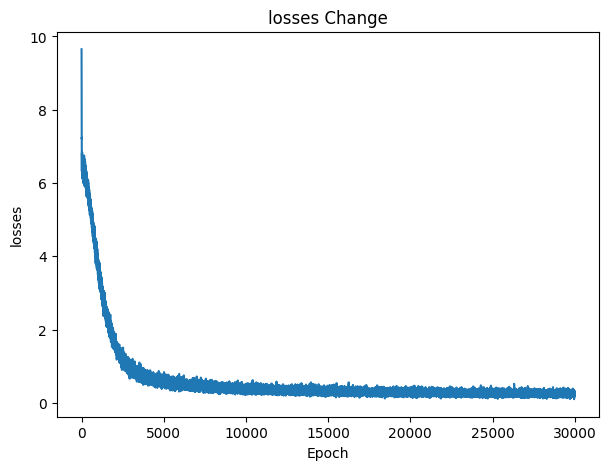

In [9]:
utils.plot_metric(losses,"losses")

In [10]:
#next(iter(test_data_loader))

## Evaluation 

In [10]:
model.eval()

batch=next(iter(test_data_loader))

#infer
masked_input = batch['input']
masked_target = batch['target']
masked_actual=batch['original']

masked_input = masked_input.cuda(non_blocking=True)
masked_target = masked_target.cuda(non_blocking=True)
masked_actual = masked_actual.cuda(non_blocking=True)

output = model(masked_input)
#masked_input,masked_target,output=mainUtils.eval(model,test_data_loader)

In [11]:
for i in range(0,test_batch_size):
    s_noisySentence=''
    s_actualSentence=''
    s_output=''
    lstNoise=[]
    lstCorrections=[]
    
    for j in range(0,seq_len):
        ## reconstruct the actual sentence
        s_actualSentence=s_actualSentence+" "+test_dataset.rvocab[masked_actual[i][j].item()]
        
        ## reconstruct the noisy sentence
        s_noisySentence=s_noisySentence+" "+test_dataset.rvocab[masked_input[i][j].item()]
        
        ## corllect the noise and the corrections
        if(masked_target[i][j]!=test_dataset.IGNORE_IDX):
            lstNoise.append(test_dataset.rvocab[masked_input[i][j].item()])
            s_output=s_output+" *"+test_dataset.rvocab[np.argmax(output[i][j].detach().cpu().numpy())]+"* "
            lstCorrections.append(test_dataset.rvocab[np.argmax(output[i][j].detach().cpu().numpy())])
        else:
            s_output=s_output+" "+test_dataset.rvocab[masked_input[i][j].item()]
            
    print("ORIG =>", s_actualSentence)
    print("NOISY =>",s_noisySentence)
    print("CORRECT =>",s_output)
    
    print("Noise:",lstNoise,"corrected",lstCorrections)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


ORIG =>  yyteri ( finnish : [ ˈyːˌteri ] ; swedish : ytterö ) is a district and a beach in the
NOISY =>  yyteri ( finnish : [ ˈyːˌteri ] ; swedish : ytterö ) is a district and a recent pudge the
CORRECT =>  yyteri ( finnish : [ ˈyːˌteri ] ; swedish : ytterö ) is a district and a *;*  *in*  the
Noise: ['recent', 'pudge'] corrected [';', 'in']
~~~~~~~~~~~~~~~~~~~~~~~~~~~

ORIG =>  unicycle hockey is a team sport , similar to rink hockey where players try to hit the ball with their
NOISY =>  unicycle hockey is a team sport , similar to rink hockey 590 strenuous try to hit the ball with their
CORRECT =>  unicycle hockey is a team sport , similar to rink hockey *,*  *more*  try to hit the ball with their
Noise: ['590', 'strenuous'] corrected [',', 'more']
~~~~~~~~~~~~~~~~~~~~~~~~~~~

ORIG =>  subbuteo ( sub - ( y ) oo - tee - oh ) is a tabletop football game in which
NOISY =>  subbuteo ( crystal - genuinely y ) croke - tee - oh ) is a tabletop football trove in which
CORRECT =>  subbuteo ( 